# Pandas基础
讲解Pandas的基本概念，首先导入常见的数据分析包

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Series序列
和Python的list序列类似，但是含有索引，帮助快速检索数据

In [38]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"], index=range(0,9))
print(type(a), type(b))
print(a, '\n\n', b)

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 

 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


series应用最多的地方是**时间序列**，在时间序列中，索引是时间，series值为时间对应的取值。

可以用`pd.date_range`函数创建日期或时间规律的序列，假定我们有一个每天购买商品数量的时间序列：

Length of index is 92


<AxesSubplot:>

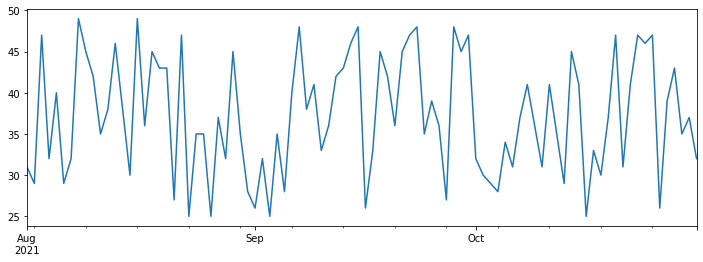

In [6]:
start_date = "2021-8-01"
end_date = "2021-10-31"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_buy = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_buy.plot(figsize=(12,4))

同时，每周日都额外购买一些商品

In [7]:
# pd.date_range(start_date,end_date,freq='5D')
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")

Additional items (10 item each week):
2021-08-01    10
2021-08-08    10
2021-08-15    10
2021-08-22    10
2021-08-29    10
2021-09-05    10
2021-09-12    10
2021-09-19    10
2021-09-26    10
2021-10-03    10
2021-10-10    10
2021-10-17    10
2021-10-24    10
2021-10-31    10
Freq: W-SUN, dtype: int64


2个序列可以按照索引相加求和

In [8]:
total_items = items_buy+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Total items (sum of two series):
2021-08-01    41.0
2021-08-02     NaN
2021-08-03     NaN
2021-08-04     NaN
2021-08-05     NaN
              ... 
2021-10-27     NaN
2021-10-28     NaN
2021-10-29     NaN
2021-10-30     NaN
2021-10-31    42.0
Length: 92, dtype: float64


`数值+缺失值NaN=NaN`，在求和之前应将索引对应的缺失值填补为0，再求和，使用函数`fill_value`

2021-08-01    41.0
2021-08-02    29.0
2021-08-03    47.0
2021-08-04    32.0
2021-08-05    40.0
              ... 
2021-10-27    39.0
2021-10-28    43.0
2021-10-29    35.0
2021-10-30    37.0
2021-10-31    42.0
Length: 92, dtype: float64


<AxesSubplot:>

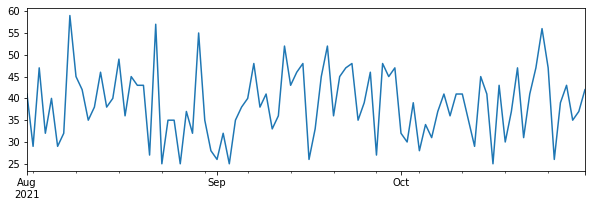

In [9]:
total_items = items_buy.add(additional_items, fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))

[Text(0, 0, 'Aug-2021'), Text(1, 0, 'Sep-2021'), Text(2, 0, 'Oct-2021')]

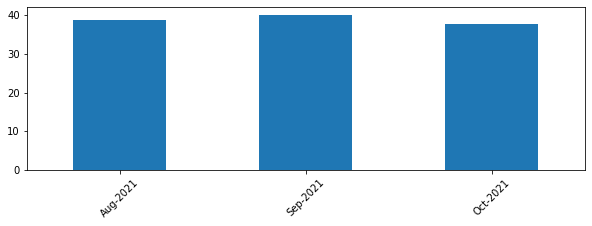

In [12]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)

## DataFrame表格

DataFrame类似于Excel的表格，是有相同索引的不同Series构成，用上面的a,b两个Series组成表格如下：
### 读取csv或txt数据

In [14]:
weather = pd.read_csv('../data/weather_by_cities.csv')
weather

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


### 读取excel数据

In [15]:
weather = pd.read_excel('../data/weather_by_cities.xlsx')
weather.head()

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny


对于大文件，一次性读入可能花费很多时间，或者内存根本装不下；

此时，可以选择先读取少部分数据做分析用图；下列命令`nrows=2`表示读取前2行

In [16]:
weather1 = pd.read_excel('../data/weather_by_cities.xlsx', nrows=2)
weather1

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny


### 读取无表头数据时，增加列名

In [17]:
col = ['col1', 'col2', 'col3', 'col4', 'col5']
weather2 = pd.read_excel('../data/weather_by_cities.xlsx', nrows=6, names=col)
weather2

,col1,col2,col3,col4,col5
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog


### 基于**行数据**生成DataFrame

In [39]:
df1 = pd.DataFrame([a,b])
df1

,0,1,2,3,4,5,6,7,8
0,1,2,3,4,5,6,7,8,9
1,I,like,to,use,Python,and,Pandas,very,much


### 基于**列数据**生成DataFrame

In [40]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


### 表格可以转置

In [41]:
df1 = df1.T
df1

,0,1
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


## 表格查看
`df.shape`查看数据维度

`df.info()`展示基本信息

`df.describe()`展示数字列的统计信息

`df.A.unique()`A列的唯一值列表

`df.A.nunique()`A列的唯一值数量

In [42]:
df.shape

(9, 2)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       9 non-null      int64 
 1   B       9 non-null      object
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


In [44]:
df.describe()

,A
count,9.000000
mean,5.000000
std,2.738613
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,9.000000


In [45]:
df.A.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [46]:
df.A.nunique()

9

### 修改列名称

In [47]:
print(df.columns)
df.columns = ['A', 'B']  # 用该列表替换所有列名
# df = df.rename(columns={'A': 'A11'})  # 改一列的列名
df

Index(['A', 'B'], dtype='object')


,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


### 选择列

In [48]:
df.A #列名为一个不含空格的单词

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64

In [49]:
df[['A']]

,A
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [50]:
df[['A', 'B']]

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


### 选择行

In [51]:
# df.head(100) #前100行
df.head()

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python


In [52]:
# df.tail(100)
df.tail()

,A,B
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


### 排序

In [53]:
df

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


In [54]:
d1 = df.sort_values('A') # 默认正序排列
d1

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


In [55]:
d1 = df.sort_values('A', ascending=False) # 倒序
d1

,A,B
8,9,much
7,8,very
6,7,Pandas
5,6,and
4,5,Python
3,4,use
2,3,to
1,2,like
0,1,I


In [56]:
d1.sort_values(['A','B'])

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


### 根据条件筛选

In [57]:
df[df['A']<5]

,A,B
0,1,I
1,2,like
2,3,to
3,4,use


`df['A']<5`返回一个真假值series，表明每个元素是True或False，表格根据真假值筛选出对应的行。

多个条件筛选时，用`&`（表示且）或`|`（表示或）连接

In [58]:
# df[(df['A']>5) | (df['A']<7)]
df[(df['A']>5) & (df['A']<7)]

,A,B
5,6,and


### 根据行号、列号选择
格式为：`df.iloc[行开始位置：行结束位置，列开始位置：列结束位置]`，和Python的List一样，数字可以省略，表示默认起始位置开始，或默认到结束位置

In [59]:
df.iloc[:3]
df.iloc[5:7, :]
df.iloc[2:6, 1:4]

,B
2,to
3,use
4,Python
5,and


### 根据行号、列名筛选

In [60]:
df.loc[0:3, ['A', 'B']]

,A,B
0,1,I
1,2,like
2,3,to
3,4,use


### 增加列

In [61]:
df['C'] = 1
df['D'] = np.random.randint(0, 100, size=len(df))
df['E'] = df.A / 2
df['G'] = df.A + df.C + df.D
df['B_str_length'] = df['B'].apply(len)
df

,A,B,C,D,E,G,B_str_length
0,1,I,1,10,0.5,12,1
1,2,like,1,70,1.0,73,4
2,3,to,1,46,1.5,50,2
3,4,use,1,43,2.0,48,3
4,5,Python,1,93,2.5,99,6
5,6,and,1,42,3.0,49,3
6,7,Pandas,1,16,3.5,24,6
7,8,very,1,28,4.0,37,4
8,9,much,1,67,4.5,77,4


### 基本统计
可以对列进行基本统计，包括：`min()`, `max()`, `mean()`等

另一个重要的统计是**频数统计**：`df.A.value_counts()`

In [62]:
df

,A,B,C,D,E,G,B_str_length
0,1,I,1,10,0.5,12,1
1,2,like,1,70,1.0,73,4
2,3,to,1,46,1.5,50,2
3,4,use,1,43,2.0,48,3
4,5,Python,1,93,2.5,99,6
5,6,and,1,42,3.0,49,3
6,7,Pandas,1,16,3.5,24,6
7,8,very,1,28,4.0,37,4
8,9,much,1,67,4.5,77,4


In [63]:
df.A.mean(), df.A.min(), df.A.max(), df.A.std()

(5.0, 1, 9, 2.7386127875258306)

In [64]:
#频数统计，重要
df.A.value_counts()  # 单列

1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: A, dtype: int64

In [68]:
df[['A', 'G']].value_counts()   # 多列

A  G 
1  12    1
2  73    1
3  50    1
4  48    1
5  99    1
6  49    1
7  24    1
8  37    1
9  77    1
dtype: int64

### 每行运用函数，计算统计量

In [69]:
df

,A,B,C,D,E,G,B_str_length
0,1,I,1,10,0.5,12,1
1,2,like,1,70,1.0,73,4
2,3,to,1,46,1.5,50,2
3,4,use,1,43,2.0,48,3
4,5,Python,1,93,2.5,99,6
5,6,and,1,42,3.0,49,3
6,7,Pandas,1,16,3.5,24,6
7,8,very,1,28,4.0,37,4
8,9,much,1,67,4.5,77,4


In [72]:
df.apply(lambda x: len(x), axis=0)  # x表示每一行；axis=0表示针对每列, axis=1表示针对每行

A               9
B               9
C               9
D               9
E               9
G               9
B_str_length    9
dtype: int64

In [73]:
df.apply(lambda x: x.E, axis=1)  # x表示每一行；axis=0表示针对每列, axis=1表示针对每行

0    0.5
1    1.0
2    1.5
3    2.0
4    2.5
5    3.0
6    3.5
7    4.0
8    4.5
dtype: float64

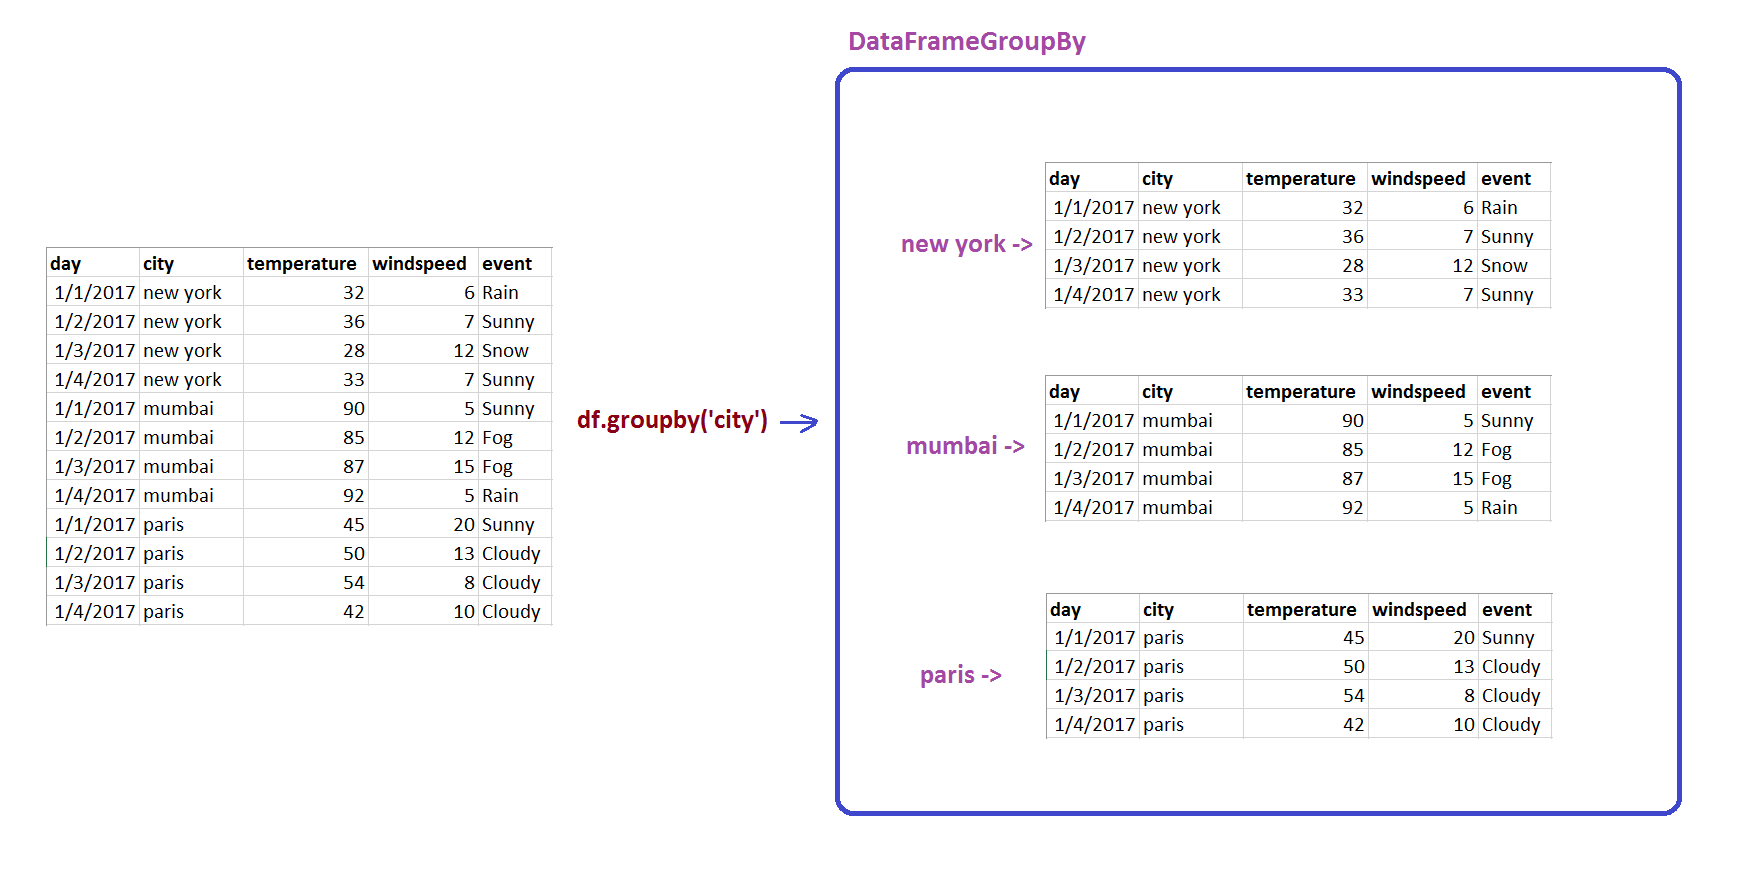### 透视图（重要）
按照一定的标准给数据分组，对每组数据进行一定的统计
`df.groupby()`函数按照`split-apply-combine`原则分析数据
* `split`-首先对数据按照列的不同值分组，分组标准由by参数给定
* `apply`-对每个分组数据，应用给定的分析处理函数，处理函数有func参数给定
* `combine`-将所有组的结果汇总，汇总会自动完成

<img src="../data/group_by_cities.png" alt="drawing" width="1000px"/>
<img src="../data/split_apply_combine.png" alt="drawing" width="1000px"/>

In [74]:
df

,A,B,C,D,E,G,B_str_length
0,1,I,1,10,0.5,12,1
1,2,like,1,70,1.0,73,4
2,3,to,1,46,1.5,50,2
3,4,use,1,43,2.0,48,3
4,5,Python,1,93,2.5,99,6
5,6,and,1,42,3.0,49,3
6,7,Pandas,1,16,3.5,24,6
7,8,very,1,28,4.0,37,4
8,9,much,1,67,4.5,77,4


### 用groupby函数统计B列字符长度的分布

In [75]:
df.groupby(by='B_str_length').apply(func=lambda x: len(x))  # x表示分组后一个小表的数据
df.groupby('B_str_length').apply(lambda x: len(x))  # 参数名称可省略
df.groupby('B_str_length').apply(len)

B_str_length
1    1
2    1
3    2
4    3
6    2
dtype: int64

In [64]:
df['B_str_length'].value_counts()

4    3
3    2
6    2
1    1
2    1
Name: B_str_length, dtype: int64

### 统计不同城市不同气候的天数

In [78]:
weather

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [79]:
t = weather.groupby(by=['city', 'event']).apply(len)
t

city      event 
mumbai    Fog       2
          Rain      1
          Sunny     1
new york  Rain      1
          Snow      1
          Sunny     2
paris     Cloudy    3
          Sunny     1
dtype: int64

### 统计不同城市不同气候的平均气温,平均风速

In [93]:
r1 = weather.groupby(by=['city', 'event']).apply(lambda x: x.temperature.mean())
r1

city      event 
mumbai    Fog       86.000000
          Rain      92.000000
          Sunny     90.000000
new york  Rain      32.000000
          Snow      28.000000
          Sunny     34.500000
paris     Cloudy    48.666667
          Sunny     45.000000
dtype: float64

In [94]:
r2 = weather.groupby(by=['city', 'event']).apply(lambda x: x.windspeed.mean())
r2

city      event 
mumbai    Fog       13.500000
          Rain       5.000000
          Sunny      5.000000
new york  Rain       6.000000
          Snow      12.000000
          Sunny      7.000000
paris     Cloudy    10.333333
          Sunny     20.000000
dtype: float64

### 上面的结果可以转化为DataFrame表格

In [95]:
r1 = r1.to_frame('avg_temperature').reset_index()  # series转化为Dataframe表格，重置索引为列
r2 = r2.to_frame('avg_windspeed').reset_index()
pd.merge(r1, r2) # 合并


,city,event,avg_temperature,avg_windspeed
0,mumbai,Fog,86.000000,13.500000
1,mumbai,Rain,92.000000,5.000000
2,mumbai,Sunny,90.000000,5.000000
3,new york,Rain,32.000000,6.000000
4,new york,Snow,28.000000,12.000000
5,new york,Sunny,34.500000,7.000000
6,paris,Cloudy,48.666667,10.333333
7,paris,Sunny,45.000000,20.000000


In [96]:
r1

,city,event,avg_temperature
0,mumbai,Fog,86.000000
1,mumbai,Rain,92.000000
2,mumbai,Sunny,90.000000
3,new york,Rain,32.000000
4,new york,Snow,28.000000
5,new york,Sunny,34.500000
6,paris,Cloudy,48.666667
7,paris,Sunny,45.000000


### 也可以直接计算所有数值列的均值

In [99]:
r3 = weather.groupby(by=['city', 'event']).mean().reset_index()
r3

,city,event,temperature,windspeed
0,mumbai,Fog,86.000000,13.500000
1,mumbai,Rain,92.000000,5.000000
2,mumbai,Sunny,90.000000,5.000000
3,new york,Rain,32.000000,6.000000
4,new york,Snow,28.000000,12.000000
5,new york,Sunny,34.500000,7.000000
6,paris,Cloudy,48.666667,10.333333
7,paris,Sunny,45.000000,20.000000


### 导出结果到csv，txt或xlsx等格式

In [ ]:
r3.to_csv('../data/city_weather_freq.csv', index=False) # index=False表示不导出索引

In [ ]:
r3.to_csv('../data/city_weather_freq.txt', index=False) # index=False表示不导出索引

In [ ]:
r3.to_csv('../data/city_weather_freq.xlsx', index=False) # index=False表示不导出索引